In [7]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern as LBP

In [8]:
def load_images_from_folder(folder_path):
    images = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        image = cv.imread(file_path, cv.IMREAD_GRAYSCALE)
        if image is not None:
            images.append(image)
    return images

In [9]:
healthy_path = os.path.join("images", "leaves", "healthy")
unhealthy_path = os.path.join("images", "leaves", "unHealth")

healthy_images = load_images_from_folder(healthy_path)
unhealthy_images = load_images_from_folder(unhealthy_path)

In [10]:
radius = 1
n_points = 8 * radius  

# محاسبه LBP برای تصاویر سالم
healthy_LBP = [LBP(image, n_points, radius, method="uniform") for image in healthy_images]

# محاسبه LBP برای تصاویر ناسالم
unhealthy_LBP = [LBP(image, n_points, radius, method="uniform") for image in unhealthy_images]


In [11]:
# تبدیل LBP به آرایه‌های Numpy با نوع داده uint8
healthy_LBP = np.array(healthy_LBP, dtype=np.uint8)
unhealthy_LBP = np.array(unhealthy_LBP, dtype=np.uint8)

# تعریف توابع برای محاسبه هیستوگرام
def calculate_histograms(lbp_images, bins=10, range_start=0, range_end=10):
    histograms = []
    for image in lbp_images:
        hist = cv.calcHist([image], [0], None, [bins], [range_start, range_end])
        histograms.append(hist)
    return histograms

# محاسبه هیستوگرام برای تصاویر سالم و ناسالم
healthy_hist = calculate_histograms(healthy_LBP)
unhealthy_hist = calculate_histograms(unhealthy_LBP)

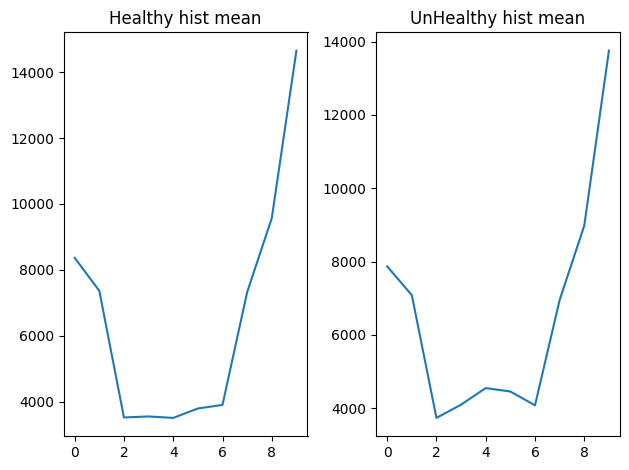

In [12]:
# میانگین هیستوگرام‌ها
healthy_hist_mean = np.mean(healthy_hist, axis=0)
unHealthy_hist_mean = np.mean(unhealthy_hist, axis=0)

# نمایش نمودار هیستوگرام میانگین
plt.subplot(1, 2, 1)
plt.plot(healthy_hist_mean)
plt.title("Healthy hist mean")

plt.subplot(1, 2, 2)
plt.plot(unHealthy_hist_mean)
plt.title("UnHealthy hist mean")

plt.tight_layout()
plt.show()

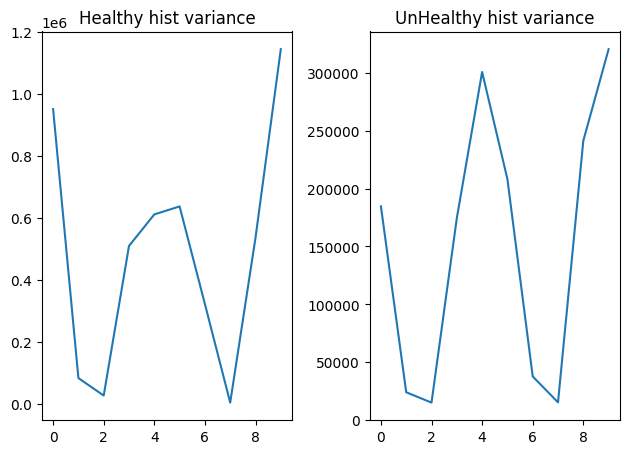

In [13]:
# محاسبه واریانس هیستوگرام‌ها
healthy_hist_var = np.var(healthy_hist, axis=0)
unHealthy_hist_var = np.var(unhealthy_hist, axis=0)

# نمایش نمودار واریانس هیستوگرام‌ها
plt.subplot(1, 2, 1)
plt.plot(healthy_hist_var)
plt.title("Healthy hist variance")

plt.subplot(1, 2, 2)
plt.plot(unHealthy_hist_var)
plt.title("UnHealthy hist variance")

plt.tight_layout()
plt.show()